C:\Users\Tusha\AppData\Local\Temp\ipykernel_14528\1513026793.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  data = pd.read_csv(


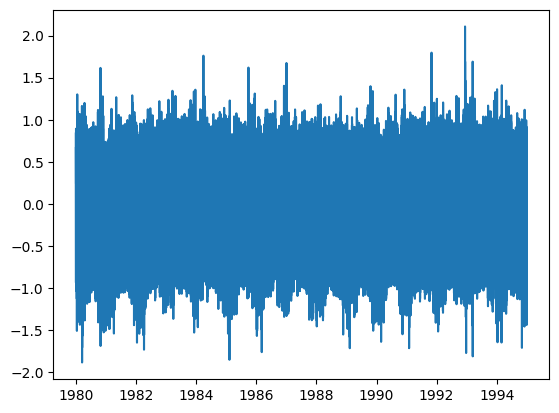

In [4]:
import pandas as pd
import pyextremes as px
from matplotlib import pyplot as plt
from pyextremes.plotting import plot_extremes

data = pd.read_csv(
    "dataset/battery_wl.csv",
    index_col=0,
    parse_dates=True,
    squeeze=True,
)
data = (
    data
    .sort_index(ascending=True)
    .astype(float)
    .dropna()
)
data = data.loc[pd.to_datetime("1980"):pd.to_datetime("1995")]
data = data - (data.index.array - pd.to_datetime("1992")) / pd.to_timedelta("365.2425D") * 2.87e-3

plt.plot(data)

In [5]:
modelHS=px.EVA(data)
modelHS


                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             131,070
Start:                       January 1980      End:                         January 1995
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

209

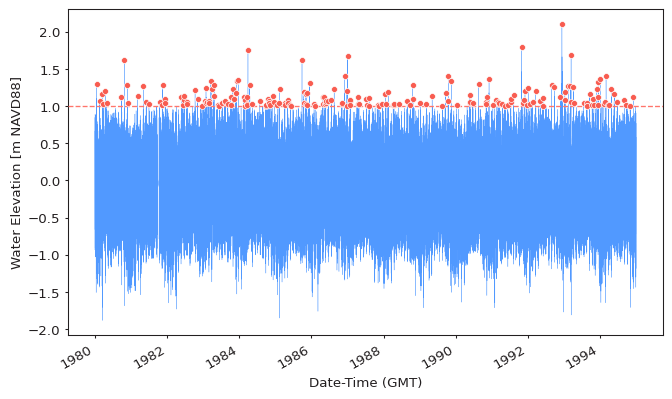

In [6]:
modelHS.get_extremes(method="POT",extremes_type='high', threshold= 1.0,)
modelHS.plot_extremes()
modelHS.extremes.count()


In [7]:
modelHS.fit_model(model="MLE")
rp=[1,2,5,10,25,50]
summary= modelHS.get_summary(
    return_period=rp,
    alpha=0.95,   
)
print(summary)

               return value  lower ci  upper ci
return period                                  
1.0                1.345495  1.285351  1.398074
2.0                1.481513  1.381894  1.582282
5.0                1.702032  1.523807  1.909811
10.0               1.906230  1.643676  2.256555
25.0               2.237286  1.822103  2.899439
50.0               2.543839  1.977606  3.576199


In [8]:

print (rp)
for value in summary['return value']:
    if value != 0:
        print(f" {abs(100 / value) : .2f}% chance of occurrence in 1 year")
   

[1, 2, 5, 10, 25, 50]
  74.32% chance of occurrence in 1 year
  67.50% chance of occurrence in 1 year
  58.75% chance of occurrence in 1 year
  52.46% chance of occurrence in 1 year
  44.70% chance of occurrence in 1 year
  39.31% chance of occurrence in 1 year


In [9]:
modelHS

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:    Water Elevation [m NAVD88]      Size:                             131,070
Start:                       January 1980      End:                         January 1995
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                209      Extraction method:                    POT
Type:                                high      Threshold:                            1.0
                                         Model                                          
----------------------------------------------------------------------------------------
Model:               

(<Figure size 768x768 with 4 Axes>,
 (<Axes: title={'center': 'Return value plot'}, xlabel='Return period', ylabel='Water Elevation [m NAVD88]'>,
  <Axes: title={'center': 'Probability density plot'}, xlabel='Water Elevation [m NAVD88]', ylabel='Probability density'>,
  <Axes: title={'center': 'Q-Q plot'}, xlabel='Theoretical', ylabel='Observed'>,
  <Axes: title={'center': 'P-P plot'}, xlabel='Theoretical', ylabel='Observed'>))

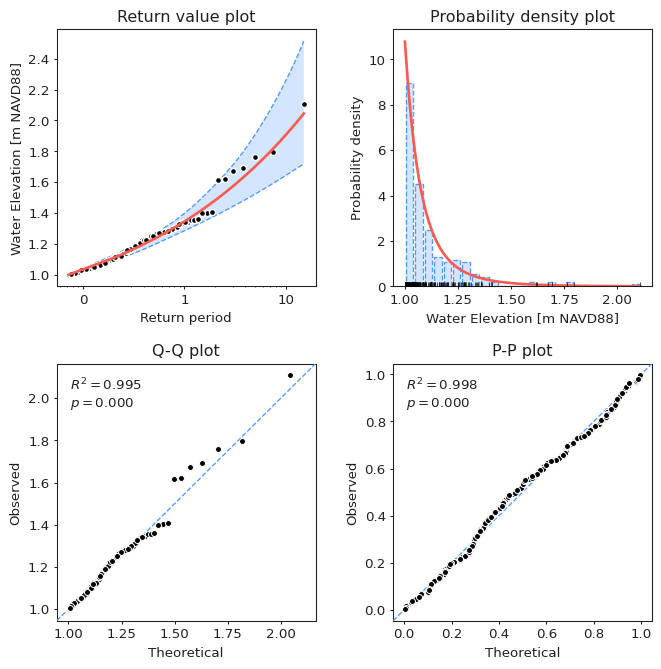

In [10]:
modelHS.plot_diagnostic(alpha=0.95)